In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

In [5]:
SEED = 34

# 데이터 가져오기

In [26]:
fashion_mnist = keras.datasets.fashion_mnist

In [27]:
((train_images,train_labels),(test_images, test_labels)) = fashion_mnist.load_data()

In [28]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [29]:
# 레이블을 설정
labels = [
          'T-shirt/top',    # index 0
          'Trouser',        # index 1
          'Pullover',       # index 2
          'Dress',          # index 3
          'Coat',           # index 4
          'Sandal',         # index 5
          'Shirt',          # index 6
          "Sneaker",        # index 7
          "Bag",            # index 8
          "Ankle boot"      # index 9
]

def idx2label(idx):
    return labels[idx]

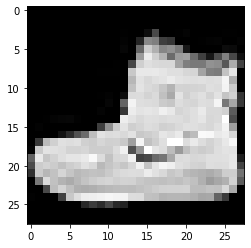

Ankle boot


In [30]:
# 이미지 출력해보기
plt.imshow(train_images[0], cmap = 'gray')
plt.show()
print(idx2label(test_labels[0]))

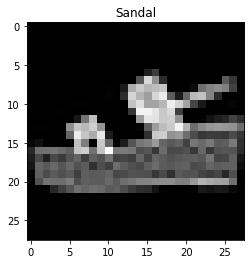

In [31]:
def show(idx):
    plt.imshow(train_images[idx], cmap = 'gray')
    plt.title(idx2label(train_labels[idx]))
    plt.show()
    
show(12)

In [32]:
train_images[train_images !=0][0]

1

In [33]:
train_images.dtype

dtype('uint8')

# 전처리

In [34]:
print(f'test_images.shape:{test_images.shape}')
print(f'test_images.dytpe:{test_images.dtype}')
print(test_images[test_images!= 0][:5])

test_images.shape:(10000, 28, 28)
test_images.dytpe:uint8
[ 3  1  7 37  1]


In [35]:
# 이미지 데이터의 최소/최대값을 출력
print(train_images.min(), train_images.max())
print(train_labels.min(), train_labels.max())


0 255
0 9


In [36]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)
print(train_images.min(), train_images.max())

0.0 255.0


## 데이터 노멀라이즈

In [37]:
train_images = train_images/255
print(train_images.min(), train_images.max())

0.0 1.0


In [39]:
def norm(data):
    min_v = data.min()
    max_v = data.max()
    return (data-min_v) / (max_v - min_v)
#train_images = norm(train_images)
test_images = norm(test_images)

In [40]:
print(test_images.min(), test_images.max())

0.0 1.0


# 시각화 하기

In [41]:
ex_train_image = train_images[:5]
print(ex_train_image.shape)

(5, 28, 28)


In [ ]:
ex_train_image = ex_train_image.transpose((1,0,2)).reshape((28,-1))

In [47]:
ex_train_image.shape

(28, 140)

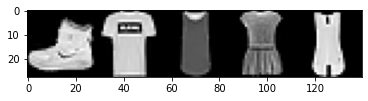

In [48]:
plt.imshow(ex_train_image,cmap = 'gray')
plt.show()

In [ ]:
## 잘 모르겠는 부분

In [ ]:
# 레이블에 따라 5개를 출력하는 함수를 만들어보세요.
def filter(label, count = 5):
    plt.imshow(train_images[ np.argwhere( train_labels == label ) [:count, ... , 0 ]].transpose((1, 0 , 2)).reshape((28, -1)))
    plt.show()
filter(0, 10)
filter(1)

In [61]:
train_images[0].shape

(28, 28)

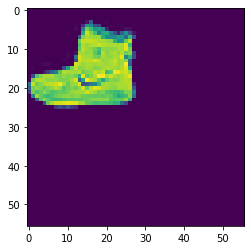

In [75]:
# 이미지 한장의 크기를 4배로 확대하고 객체는 4분면 영역중 랜덤으로 1공간에 넣는 함수

def expand_4times(img):
    bg = np.zeros(img.shape) #이미지 하나의 사이즈만큼의 배열을 생성
    idx = np.random.randint(0,4)  #인덱스값 하나 랜덤으로 설정
    
    slots = [bg,bg,bg,bg] # 이미지 크기를 배열로 다시 저장하고
    slots[idx] = img  # 배열 중에 하나는 이미지를 넣어준다
    
    expanded = np.vstack([
        np.hstack(slots[:2]), # 배열을 왼쪽에서 오른쪽으로 붙이기
        np.hstack(slots[2:])   # vstack -> 위아래
    ])
    return expanded

plt.imshow(expand_4times(train_images[0]))
plt.show()

In [76]:
# 4배 이미지 변환 전체를 train/test 데이터에 실행

train_expand_images = np.array([expand_4times(img) for img in train_images])
test_expand_images = np.array([expand_4times(img) for img in test_images])

In [77]:
train_expand_images.shape  # 이미지가 커진것을 확인할 수 있음

(60000, 56, 56)

In [81]:
# 모델링
from tensorflow.keras.layers import Input,Conv2D, MaxPool2D, Dense, Flatten, GlobalAvgPool2D, Dropout
from tensorflow.keras.models import Model

In [82]:
def single_fashion_mnist_model():
    inputs = Input((56,56,1))
    x = Conv2D(16, 2, padding='same', activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(32, 2, padding='same', activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, 2, padding='same', activation='relu')(x)
    x = MaxPool2D(2)(x)

    x = Flatten()(x)
    x = Dense(10, activation='softmax')(x)

    return Model(inputs, x)

In [83]:
single_model = single_fashion_mnist_model()
single_model.summary()

2021-12-30 11:09:09.379009: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-30 11:09:09.381627: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0     

In [85]:
# 만든 모델에 loss는 categorical_crossentropy, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.
single_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [86]:
# train_expand_images.shape # (60000, 56, 56)
train_expand_images = train_expand_images.reshape((60000, 56, 56, 1))
train_expand_images.shape 


(60000, 56, 56, 1)

In [87]:
# train_expand_images, train_labels을 학습시키고 15 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.
hist = single_model.fit(train_expand_images, 
                         tf.keras.utils.to_categorical(train_labels, 10), 
                         validation_data = (
                                test_expand_images.reshape((-1,56,56,1)), 
                                tf.keras.utils.to_categorical(test_labels, 10)),
                         epochs = 15,
                         verbose = 1
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 253s 4ms/sample - loss: 0.7309 - acc: 0.7281 - val_loss: 0.5388 - val_acc: 0.8065
Epoch 2/15
60000/60000 [==============================] - 264s 4ms/sample - loss: 0.5009 - acc: 0.8156 - val_loss: 0.4554 - val_acc: 0.8367
Epoch 3/15
60000/60000 [==============================] - 264s 4ms/sample - loss: 0.4453 - acc: 0.8364 - val_loss: 0.4106 - val_acc: 0.8536
Epoch 4/15
60000/60000 [==============================] - 268s 4ms/sample - loss: 0.4071 - acc: 0.8532 - val_loss: 0.3788 - val_acc: 0.8686
Epoch 5/15
60000/60000 [==============================] - 308s 5ms/sample - loss: 0.3801 - acc: 0.8626 - val_loss: 0.3620 - val_acc: 0.8726
Epoch 6/15
60000/60000 [==============================] - 331s 6ms/sample - loss: 0.3629 - acc: 0.8678 - val_loss: 0.3529 - val_acc: 0.8750
Epoch 7/15
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3491 - acc: 0.8734 - val_l

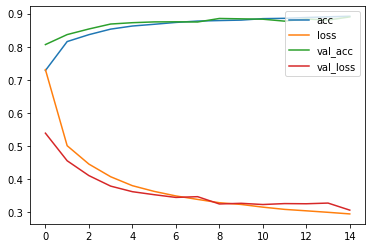

In [88]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.
plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend(loc='upper right')
plt.show()